#Rh Analytics
![Human Resources Promotion](https://events.ceu.edu/sites/default/files/styles/crop_promo_image/public/human-resources-101-intro-to-human-resources186458large.jpg?itok=8x6z1C-E)




Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


![RH process of promotion](https://drive.google.com/uc?export=view&id=1-5H7zUCEbQMkA2CjoSXEC5o0ruKpqv1_
)

Evaluation Metric
The evaluation metric for this competition is F1 Score.


[the competition link](https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement)

##Data Inspection

In [2]:
!pip install category_encoders xgboost ydata_profiling imblearn catboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=de785441392b30aab9ff66e512d62bf93a2425215f3db61ec8cc8f3614e6f9f8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn's Pipeline to integrate SMOTE
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [4]:
rh=pd.read_csv("train.csv")
rh.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
rh_test=pd.read_csv("test.csv")
rh_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
from ydata_profiling import ProfileReport
profile=ProfileReport(rh,title="Profiling Report")
profile

In [ ]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
rh.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


we can see that we have missing values in the education column and previous years rating column , we will handle both differently since they are not the same type

---

**Categorization of Variables**

In our analysis of the employee promotion dataset, we've identified various categories of variables that provide valuable insights into employee performance and suitability for promotion. By organizing these variables into distinct groups, we can effectively study and understand different aspects of employee performance. Below are the categorized variables:
1. **Employee informations:**

   - `employee_id`: Unique ID for the employee
   - `department`: Department of the employee
   - `length_of_service`: Length of service in years
   - `recruitment_channel`: Channel through which the employee was recruited

  
2. **Demographics:**

   - `age`: Age of the employee
   - `gender`: Gender of the employee
   - `education`: Education level (e.g., Bachelor’s, Master’s)
   - `region`: Region of employment

3. **Performance Metrics:**

   - `previous_year_rating`: Employee rating for the previous year
   - `no_of_trainings`: Number of other trainings completed in the previous year
   - `KPIs_met >80%`: Whether the percentage of KPIs met is greater than 80% (1 if yes, 0 if no)
   - `awards_won?`: Whether awards were won during the previous year (1 if yes, 0 if no)
   - `avg_training_score`: Average score in current training evaluations

By categorizing the variables in this manner, we can focus on specific aspects of the data during analysis and model building.

---


#EDA

##Univariate analysis

###Target Variable

<ipython-input-9-eec2b16732ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='is_promoted',palette="rocket")


<Axes: xlabel='is_promoted', ylabel='count'>

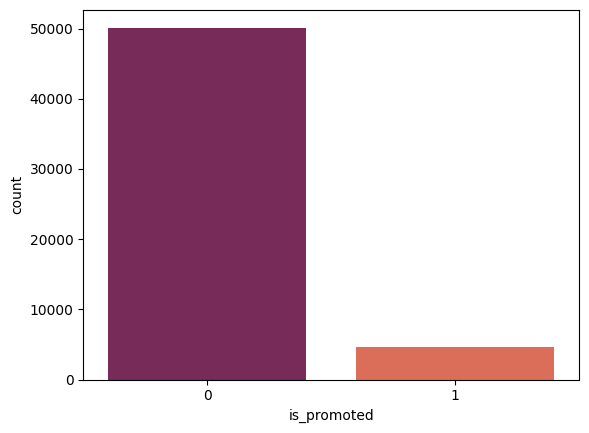

In [ ]:
sns.countplot(rh,x='is_promoted',palette="rocket")

In [ ]:
rh['is_promoted'].value_counts(normalize=True)*100

,proportion
is_promoted,
0,91.482995
1,8.517005


we can obviously see that the data is imbalanced ,we have to fix the problem using a technique such as smote

### Employee Information

<ipython-input-12-16fd041177cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='department',palette="rocket")


<Axes: xlabel='department', ylabel='count'>

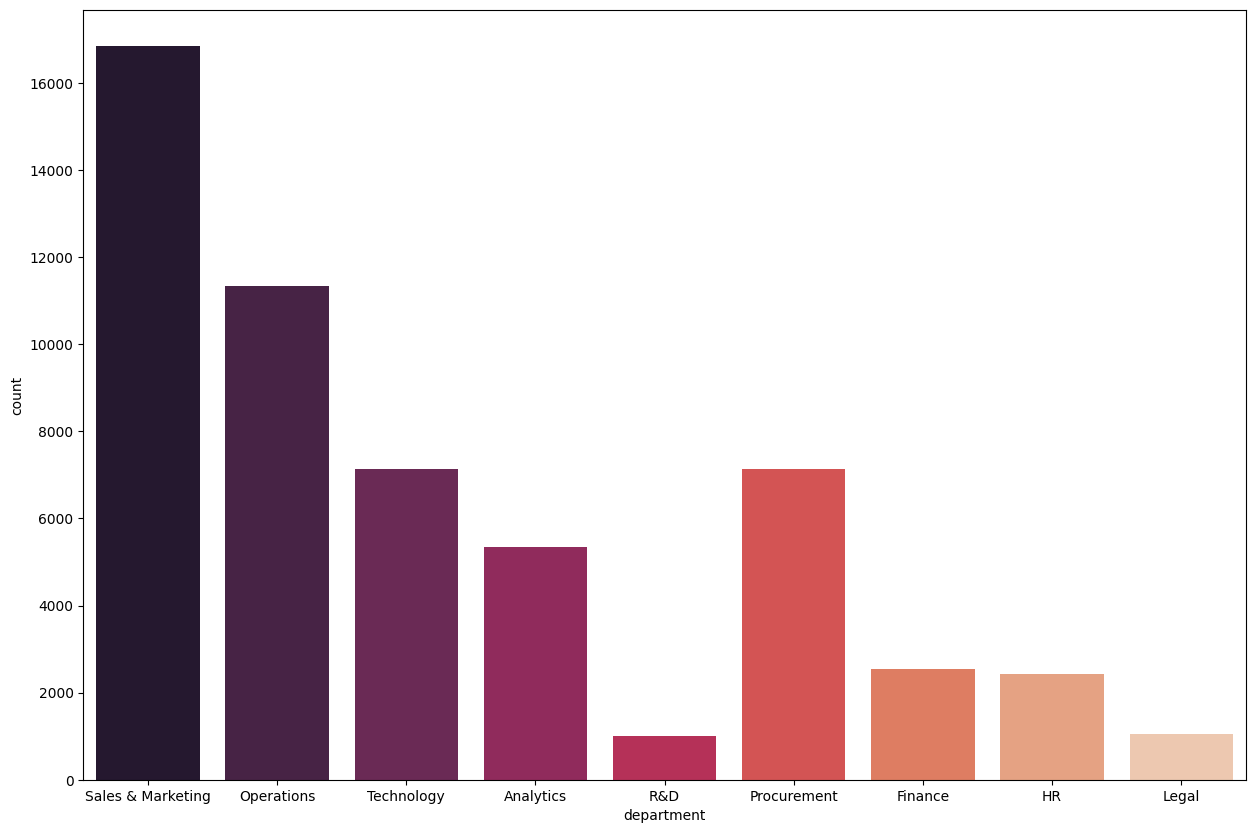

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='department',palette="rocket")


**Departmental Distribution Analysis**

The distribution of employees across departments reveals key insights about the company's focus:

- **Sales and Marketing**: 30% of employees
- **Operations**: 20%
- **Technology**: 13%
- **Procurement**: 13%
- **Analytics**: 9.8%
- **Other Departments**: The remaining percentage

This distribution highlights a significant emphasis on Sales and Marketing, indicating that these areas are central to the company's operations and strategy. The presence of substantial teams in Operations and Technology further underscores a balanced approach between client-facing roles and internal processes, reflecting the company's strategic priorities.

<ipython-input-13-c42176205865>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='recruitment_channel',palette="rocket")


<Axes: xlabel='recruitment_channel', ylabel='count'>

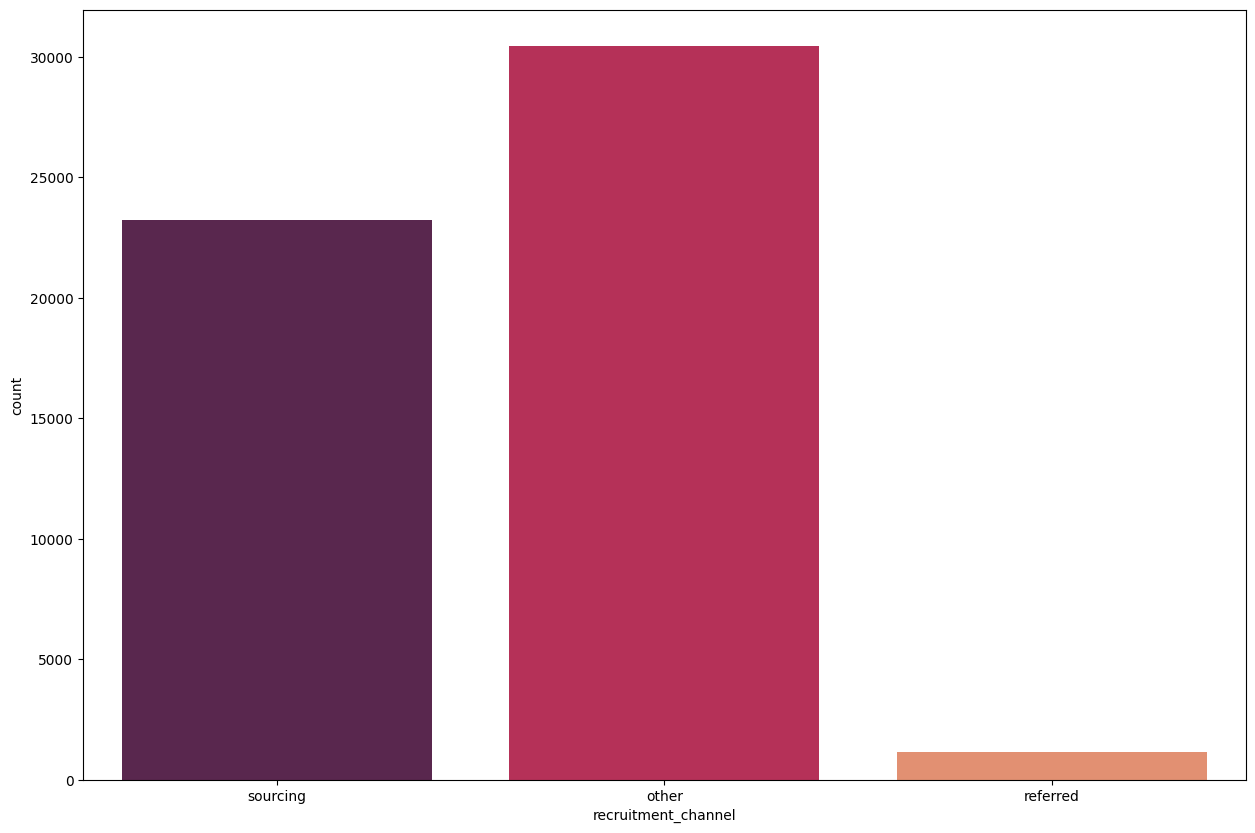

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='recruitment_channel',palette="rocket")



**Recruitment Channel Analysis**

The count plot of recruitment channels reveals the following distribution of how employees were recruited:

- **Sourcing**: 42% of employees
- **Referral**: 2.1%
- **Other Channels**: 55.6%

The majority of employees were recruited through "Other Channels," indicating a diverse approach to recruitment beyond traditional sourcing and referrals. The significant share of employees recruited via sourcing suggests it is a major recruitment strategy for the organization, while referrals contribute minimally to the overall recruitment efforts.

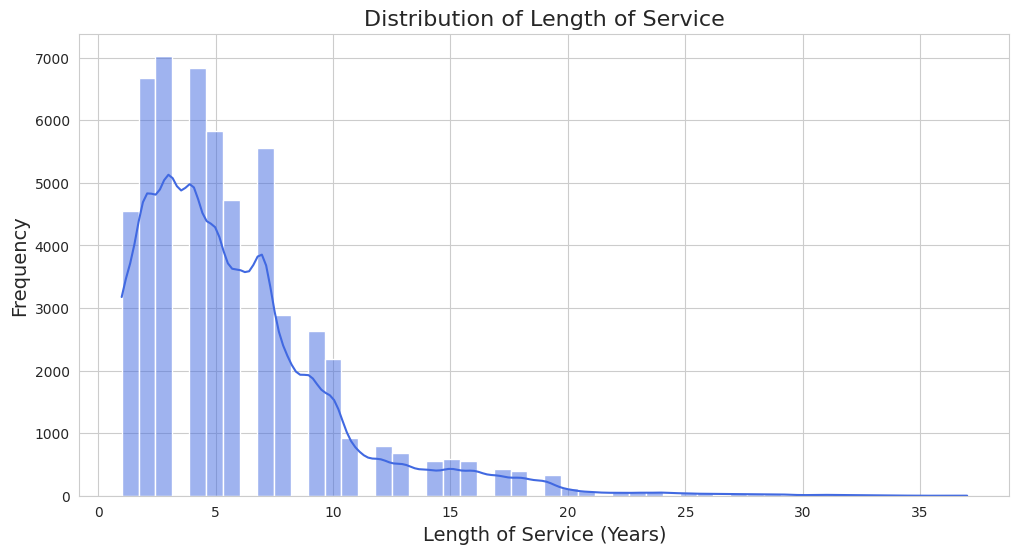

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(rh['length_of_service'], kde=True, color='royalblue', bins=50)

# Add titles and labels for clarity
plt.title('Distribution of Length of Service', fontsize=16)
plt.xlabel('Length of Service (Years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


we can see that the distrubution is significally rightly skewed which indicates that most employees have shoter lengths of service , with significance drop-off as the number of years increases.
mode is around 5 and its 3 to be exact , most employee dont exceed 10 years



###Demograhics

<ipython-input-17-0cdff90a11f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='gender',palette="rocket")


<Axes: xlabel='gender', ylabel='count'>

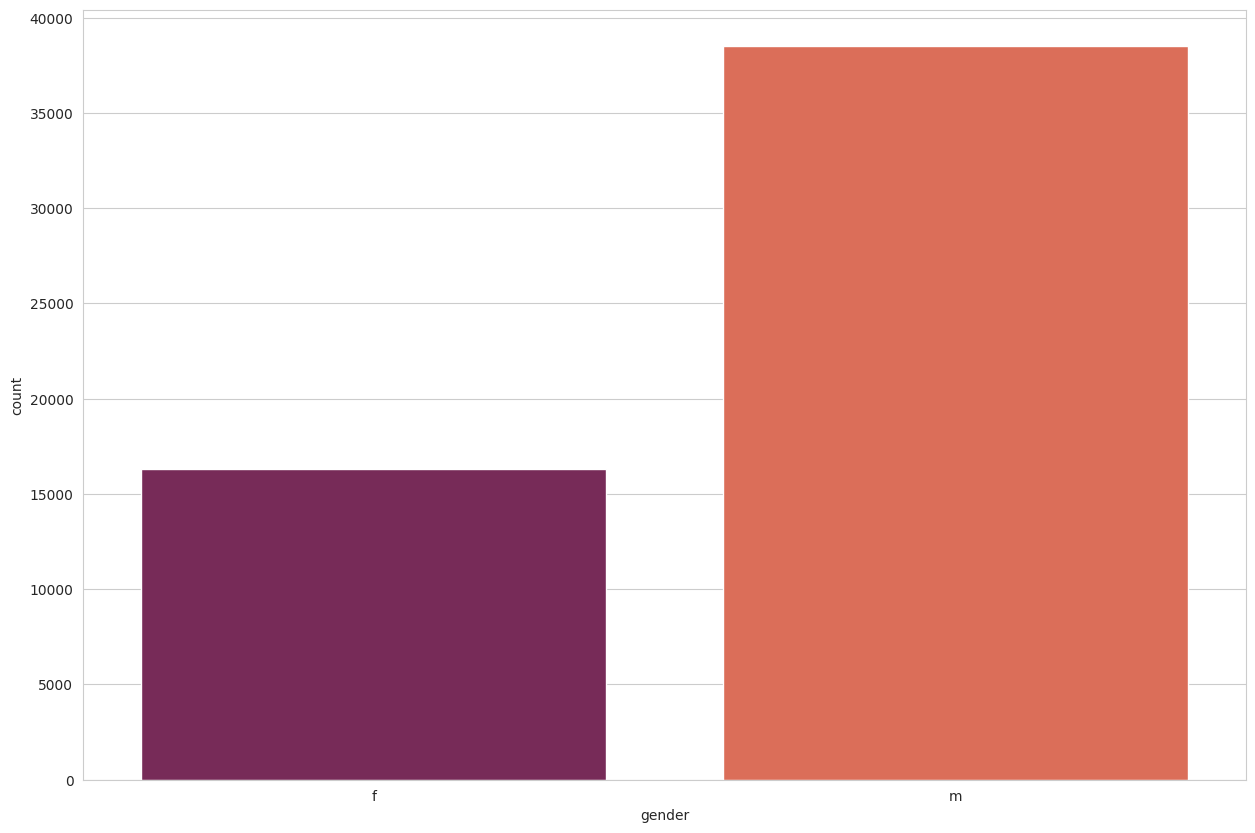

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='gender',palette="rocket")

we can say most employees of this company are males with percentage of 70% to 30% which indicates that this space is male dominated space.

Text(-1.9305555555555483, 0.5, 'Frequency')

<Figure size 1500x1000 with 0 Axes>

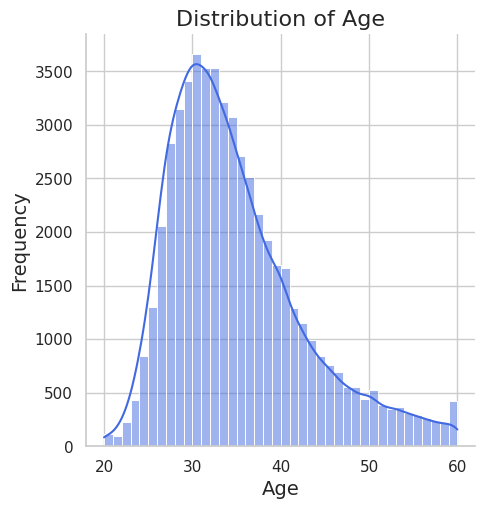

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the overall aesthetics for the plot
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
sns.displot(rh, x='age', kde=True, color='royalblue', bins=40)

# Adding titles and labels for clarity
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot


this distrubutions is rightly skewed which indicates that most employees are young , the peak age is 30yo , the low nmber of old employee might signify the the companies challenge to retain senior level employees, or the company is reletaviely new

<ipython-input-48-da9d345824f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='education',palette="rocket")


<Axes: xlabel='education', ylabel='count'>

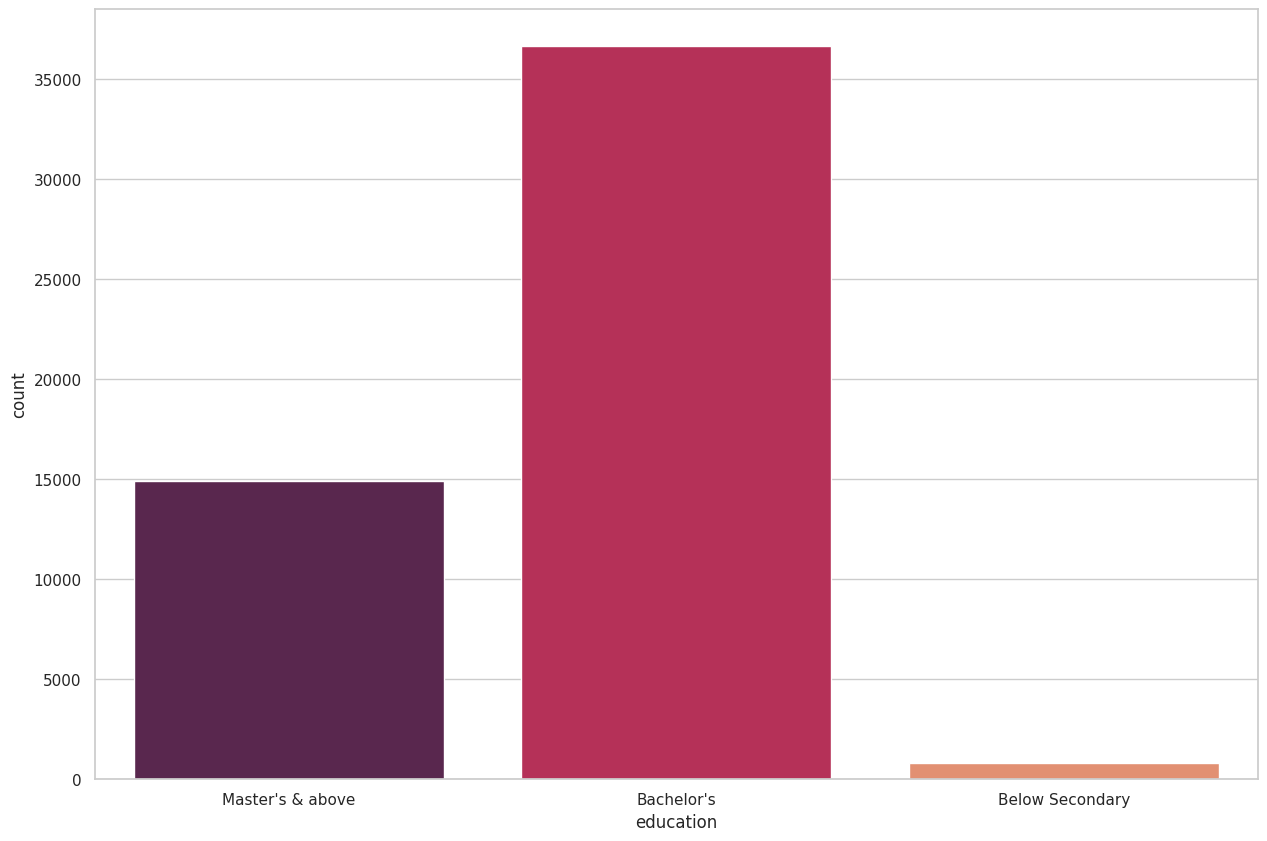

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='education',palette="rocket")

we can see that most of your employees have bachlors education with 67 percent then masters and above with 27 percent
we can see as well that this variable has missing values

In [ ]:
region_counts = rh['region'].value_counts()
small_categories = region_counts[region_counts < 700].index
rh['region'] = rh['region'].replace(small_categories, 'Other')

<ipython-input-60-0762fe82698f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rh, x='region', palette="rocket", order=rh['region'].value_counts().index)


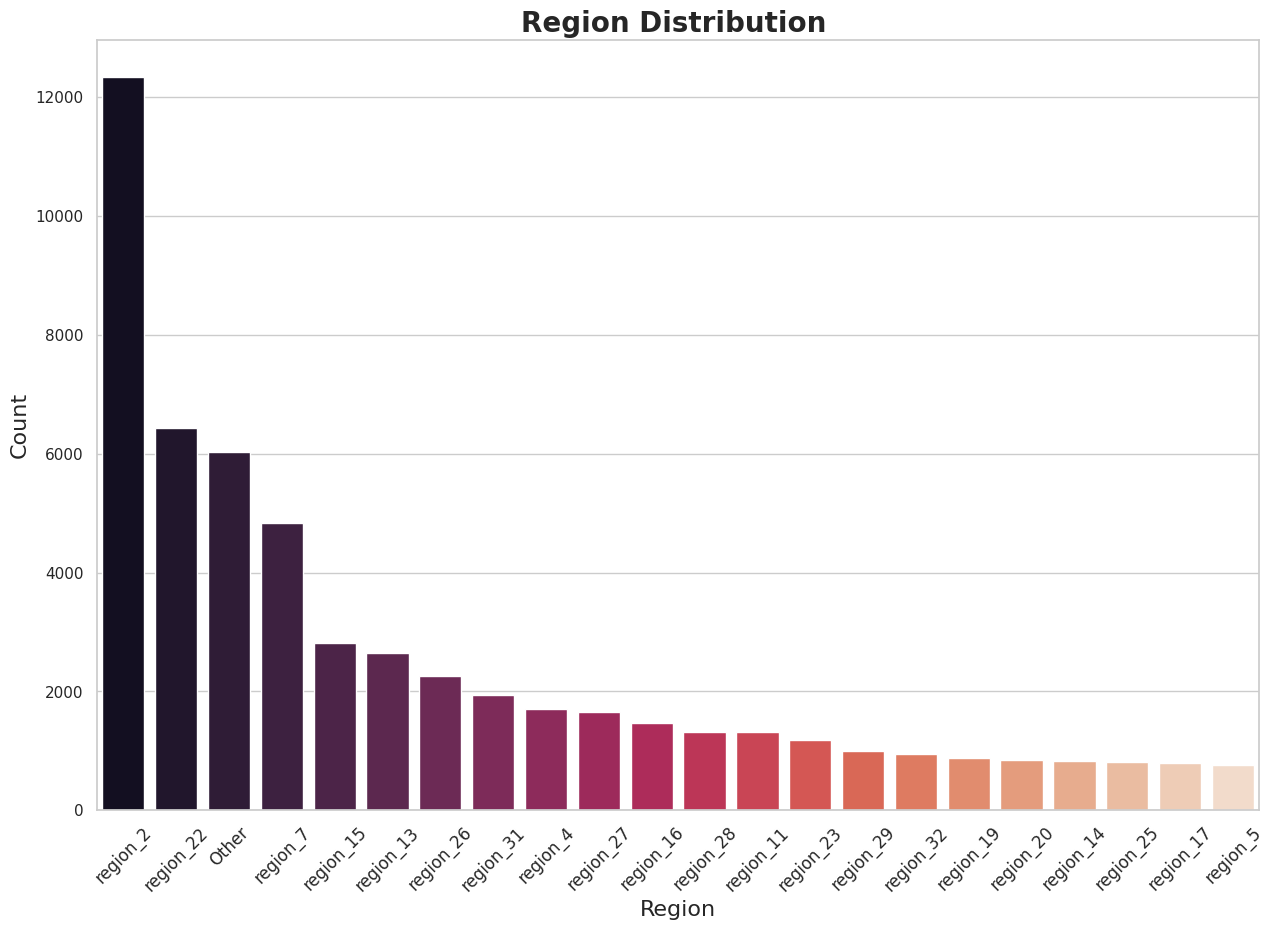

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.countplot(data=rh, x='region', palette="rocket", order=rh['region'].value_counts().index)
plt.title('Region Distribution ', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()


###Performance Metrics

3. **Performance Metrics:**

   - `previous_year_rating`: Employee rating for the previous year
   - `no_of_trainings`: Number of other trainings completed in the previous year
   - `KPIs_met >80%`: Whether the percentage of KPIs met is greater than 80% (1 if yes, 0 if no)
   - `awards_won?`: Whether awards were won during the previous year (1 if yes, 0 if no)
   - `avg_training_score`: Average score in current training evaluations


<ipython-input-56-508b24ef0d7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='previous_year_rating',palette="rocket")


<Axes: xlabel='previous_year_rating', ylabel='count'>

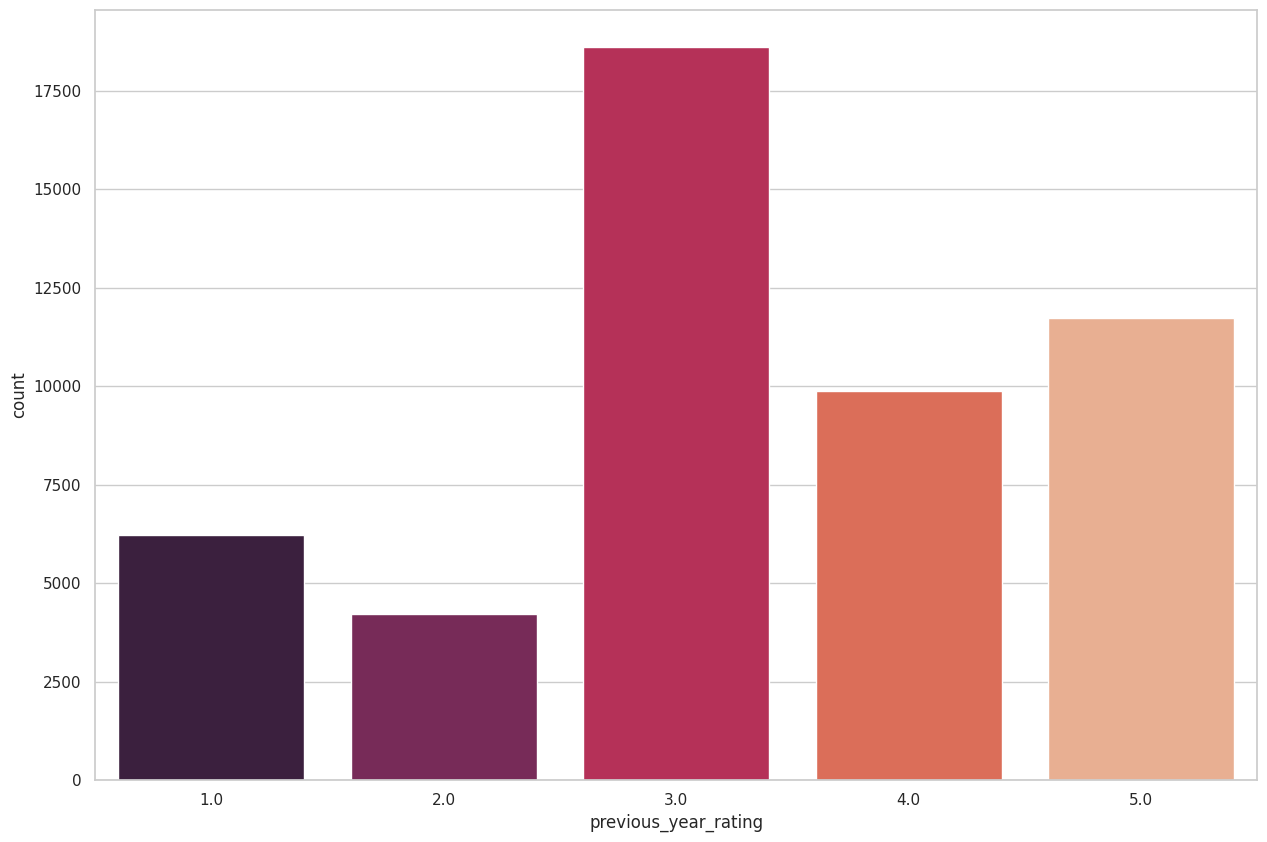

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='previous_year_rating',palette="rocket")

we can see from the countplot that people on average get a 3 score yet the 5 score is signficant as well

In [ ]:
rh['no_of_trainings'].value_counts()

,count
no_of_trainings,
1,44378
2,7987
3,1776
4,468
5,128
6,44
7,12
8,5
10,5


In [ ]:
training_counts = rh['no_of_trainings'].value_counts()
small_training_categories = training_counts[training_counts < 400].index
rh['no_of_trainings'] = rh['no_of_trainings'].replace(small_training_categories, 'Other')

<ipython-input-64-9fd20972fcae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rh, x='no_of_trainings', palette="rocket", order=rh['no_of_trainings'].value_counts().index)


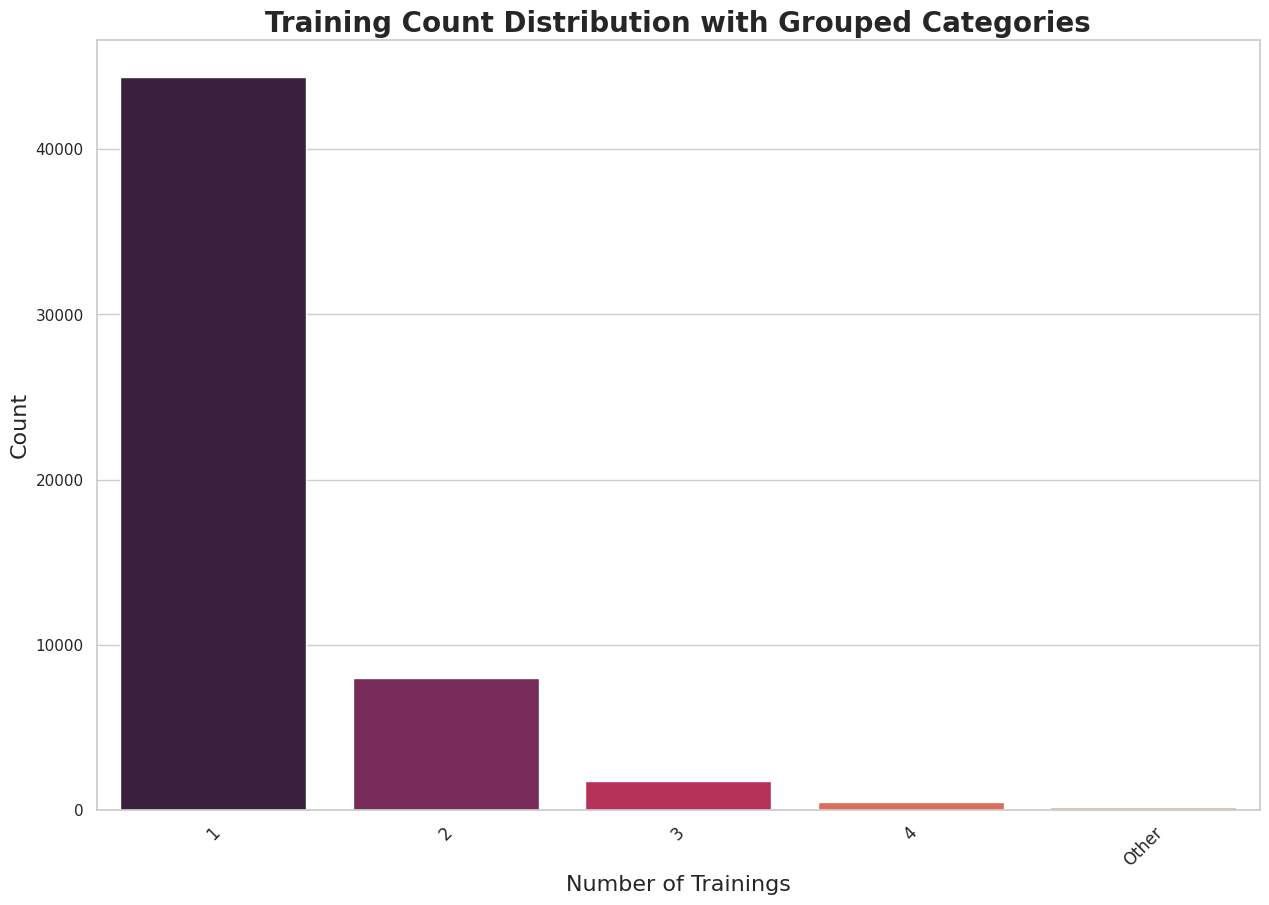

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=rh, x='no_of_trainings', palette="rocket", order=rh['no_of_trainings'].value_counts().index)
plt.title('Training Count Distribution with Grouped Categories', fontsize=20, fontweight='bold')
plt.xlabel('Number of Trainings', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

we can see that the majoriity of people took 1 training which probably be the training at the beginning of their work to familiarize with the company technology yet the ones who took more might have been subjected to issues during work

<ipython-input-71-d6aba9027bd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='KPIs_met >80%',palette="rocket")


<Axes: xlabel='KPIs_met >80%', ylabel='count'>

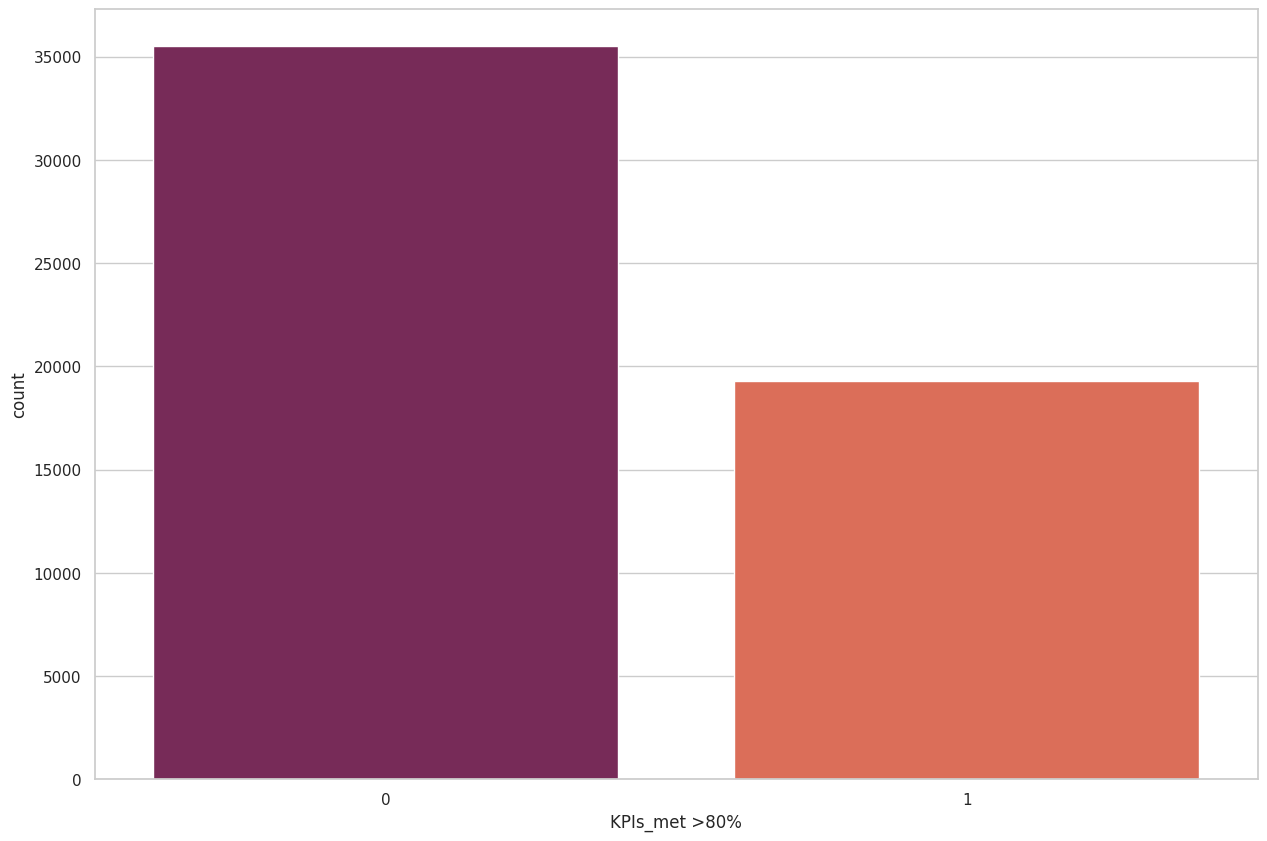

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='KPIs_met >80%',palette="rocket")

from the countplot we can conclude that most of companies employees did meet KPI>80% which rise concerns a bit towards the productivity of the employees.

<ipython-input-68-2c510fc5b4c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='awards_won?',palette="rocket")


<Axes: xlabel='awards_won?', ylabel='count'>

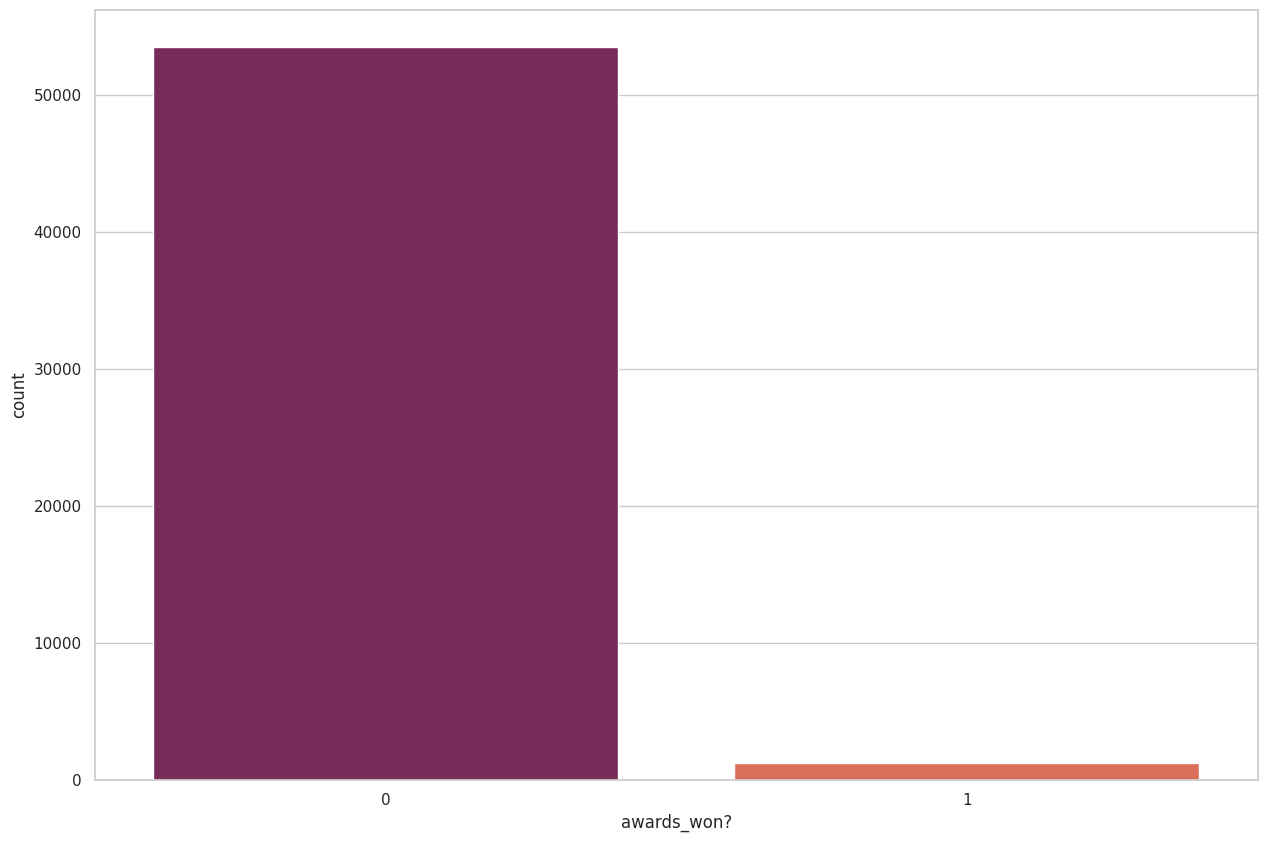

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='awards_won?',palette="rocket")

same thing with awards won , no many people won awards in the company

<ipython-input-74-bc88091a0783>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rh,x='avg_training_score',palette="rocket")


<Axes: xlabel='avg_training_score', ylabel='count'>

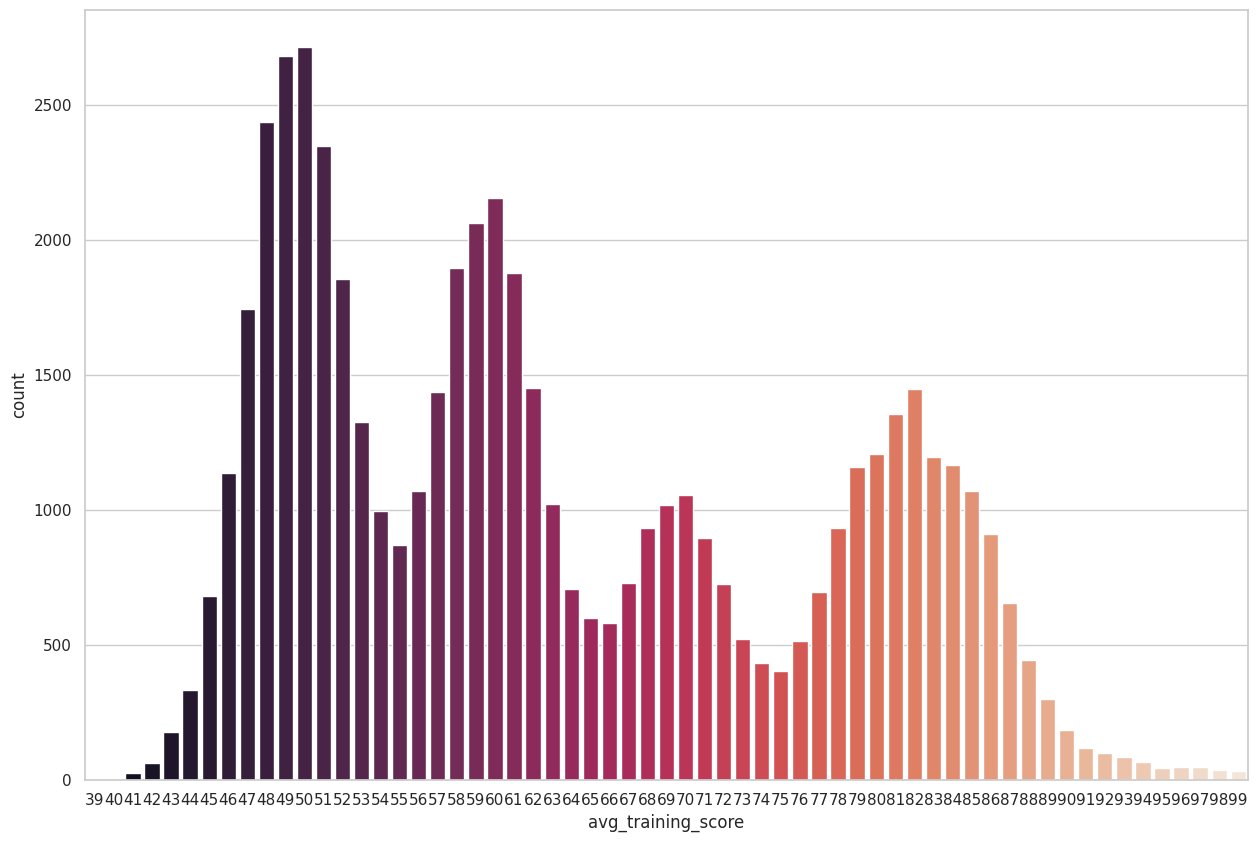

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='avg_training_score',palette="rocket")

bimodal ditrubution , there seem to be two distinct peaks of mdes in this ditrubution
Bimodal Distribution: There seem to be two distinct peaks or modes in this distribution:

The first peak is centered around the 50–60 range.
The second, smaller peak is centered around the 75–80 range.
This suggests that there may be two groups within the dataset, one with lower average training scores and another with higher scores.
  The two peaks might indicate different groups, such as individuals with different levels of training, experience, or performance. It would be worth investigating what these two groups represent.

##Multi-variate analysis

<Axes: >

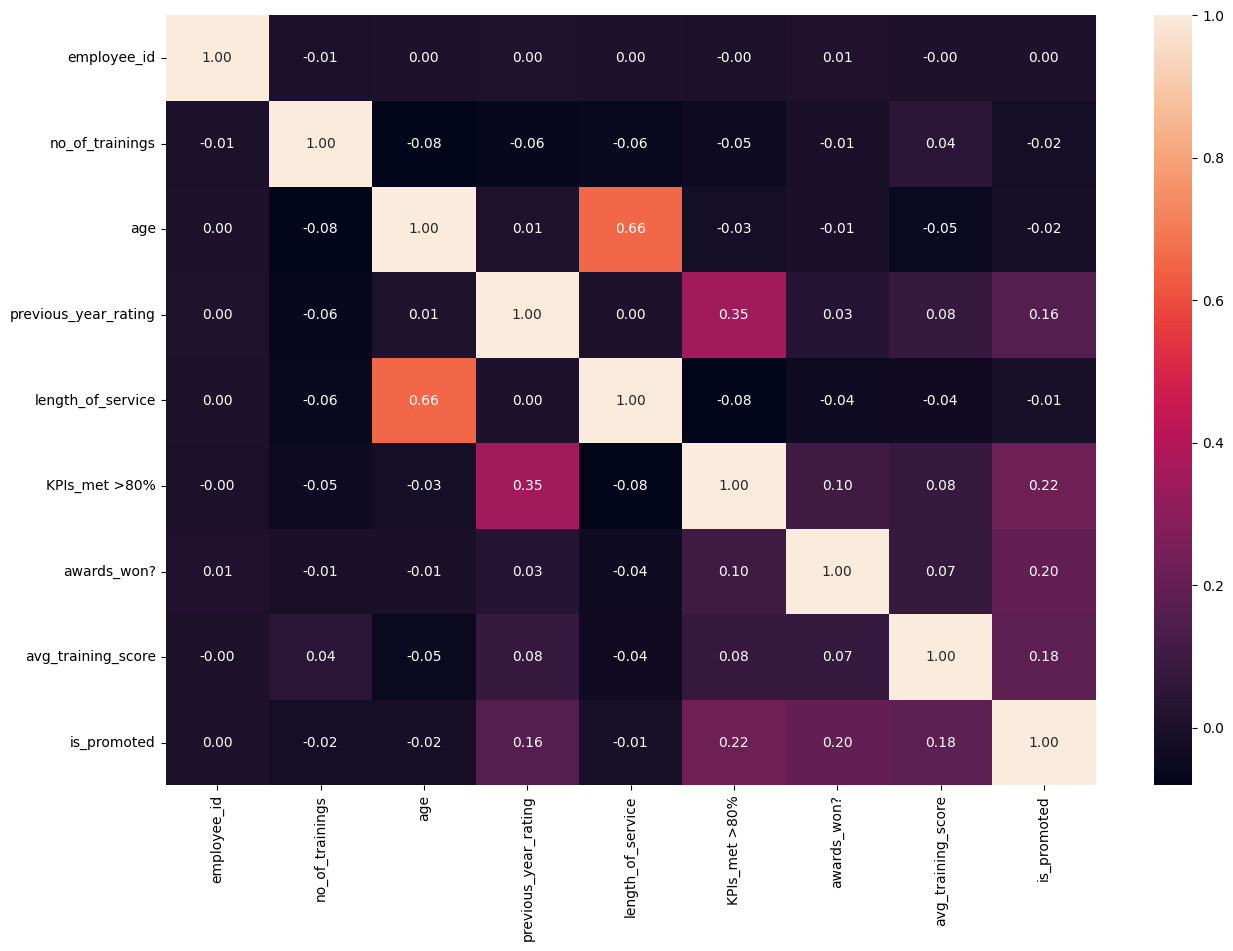

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(rh.corr(numeric_only=True),annot=True,cmap="rocket",fmt=".2f")


---
The correlation analysis reveals that performance metrics show stronger relationships with the target variable `is_promoted` compared to other factors. Notably:

- **`previous_year_rating`** has a weak positive correlation of **0.16**.
- **`no_of_trainings`** shows a negligible negative correlation of **-0.02**.
- **`KPIs_met >80%`** and **`awards_won?`** have moderate positive correlations of **0.22** and **0.20**, respectively.
- **`avg_training_score`** has a weak positive correlation of **0.18**.

In contrast, **`age`** and **`length_of_service`** exhibit only slight correlations with promotions. This indicates that performance metrics are more relevant for predicting promotions than demographic variables.

---

<Axes: xlabel='previous_year_rating', ylabel='count'>

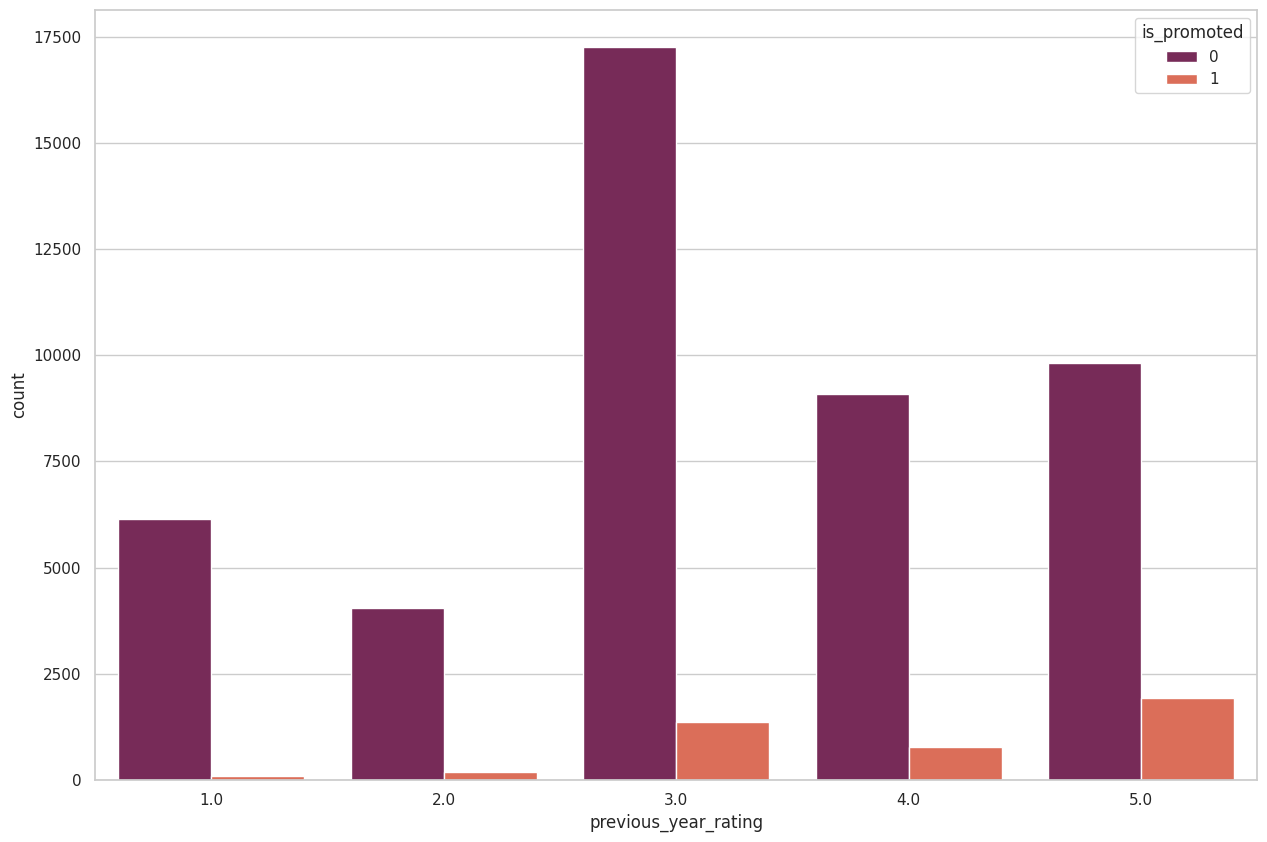

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='previous_year_rating',hue='is_promoted',palette="rocket")

we can see that the ones who got like very low score last year almost none of did get promoted yet the ones around 3 to 5 score are the ones that got promoted and the peak at 5 which suggests that last year scores had a signifcance importance in the process of promoting

<Axes: xlabel='no_of_trainings', ylabel='count'>

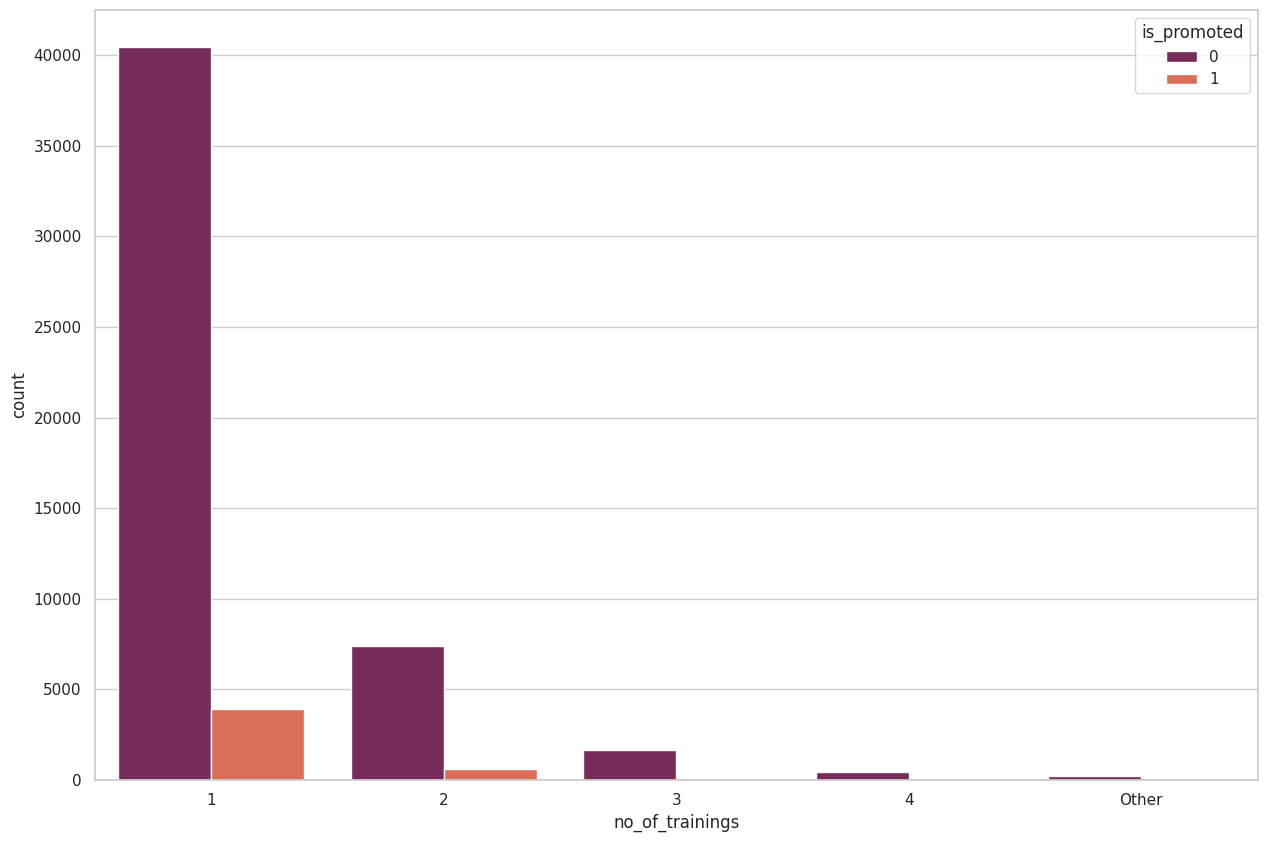

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='no_of_trainings',hue='is_promoted',palette="rocket")

more trainings means someone with less experience thats why we can see that the majority who got promoted are the ones who had only 1 trainings which is the training at the begining of their journey with the company

<Axes: xlabel='KPIs_met >80%', ylabel='count'>

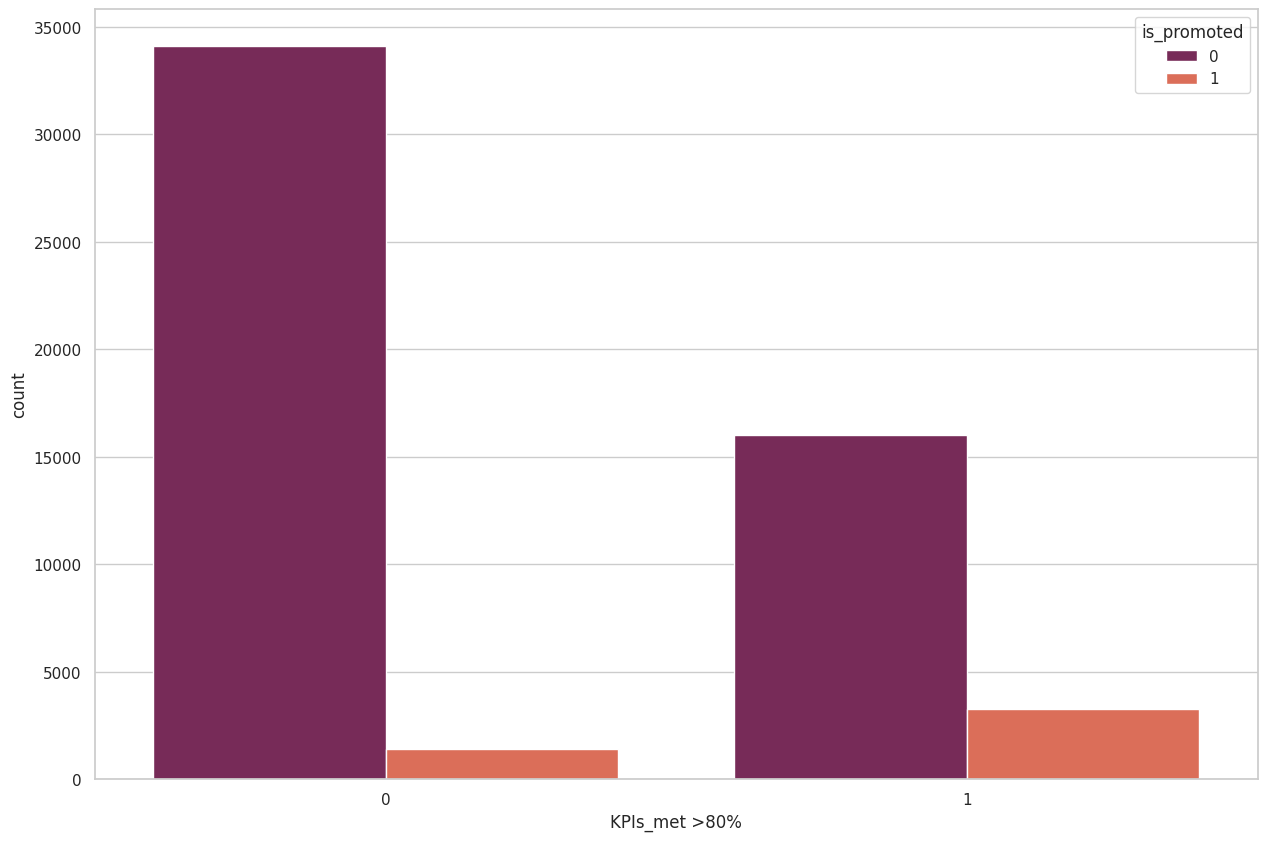

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='KPIs_met >80%',hue='is_promoted',palette="rocket")

naturally the ones who met the kpis would be the ones reffred to have better chaance at promotion yet the ones who didnt still also got prmoted which shows the mistake of the traditional methodes of promotion

<Axes: xlabel='awards_won?', ylabel='count'>

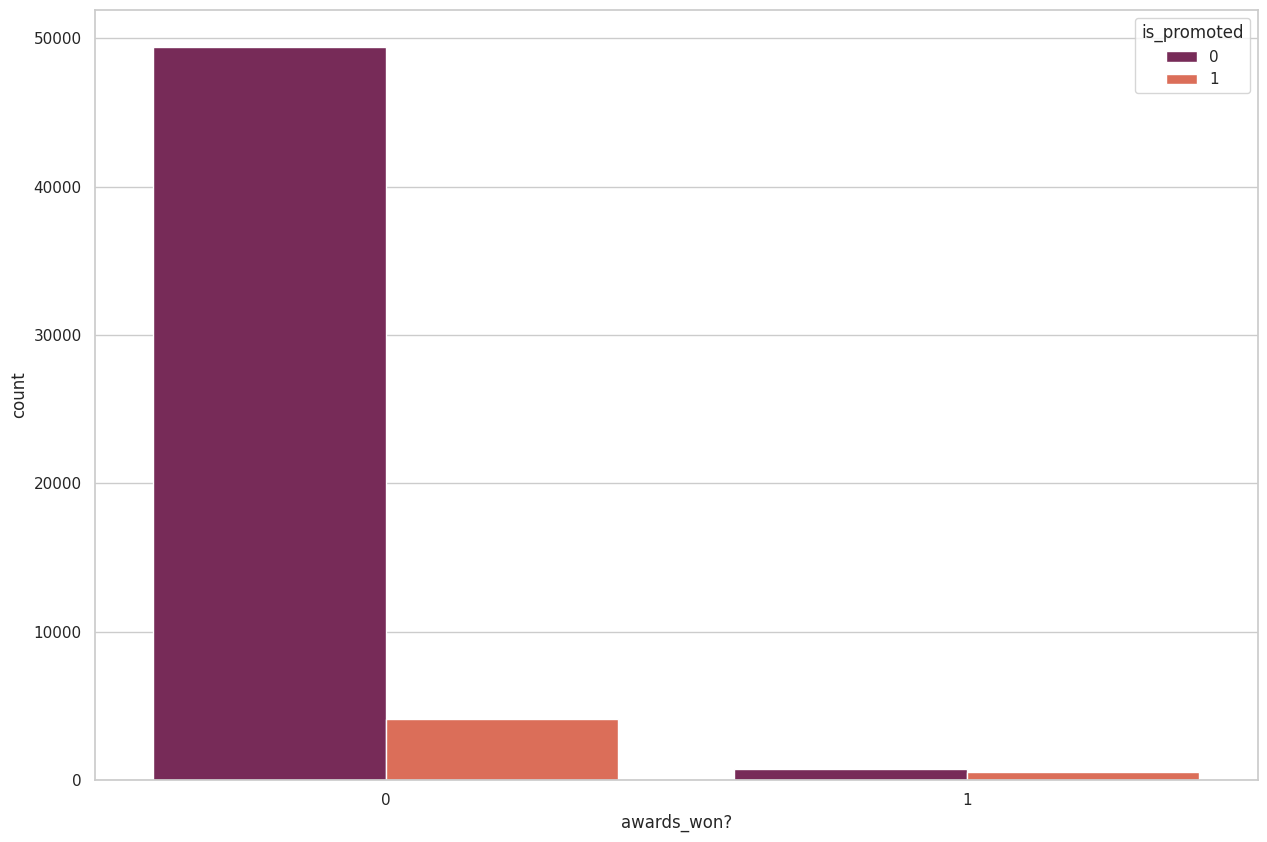

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='awards_won?',hue='is_promoted',palette="rocket")

we can see that awards dont have much effect with the promotion signficance

<Axes: xlabel='avg_training_score', ylabel='count'>

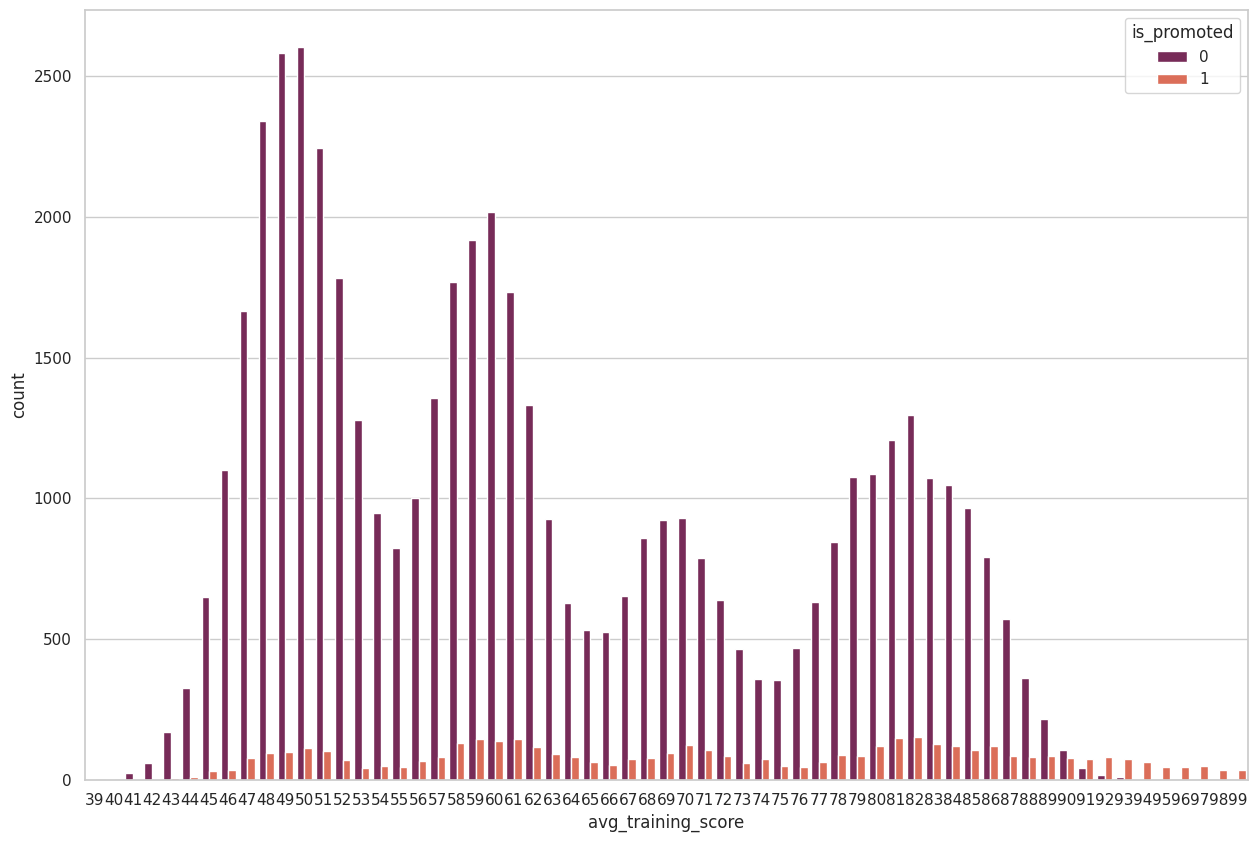

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='avg_training_score',hue='is_promoted',palette="rocket")

* Promotions seem to happen across most score ranges, but the frequency of promotions is much lower compared to non-promotions.
* Promotions are more concentrated in higher training score ranges.
* We see a larger number of promoted individuals starting from the mid-60s to around the high 70s.
* There is a notable concentration of promotions around 75–85.
this kinda shows unstable pattern of promotion across different scores


<Axes: xlabel='age', ylabel='count'>

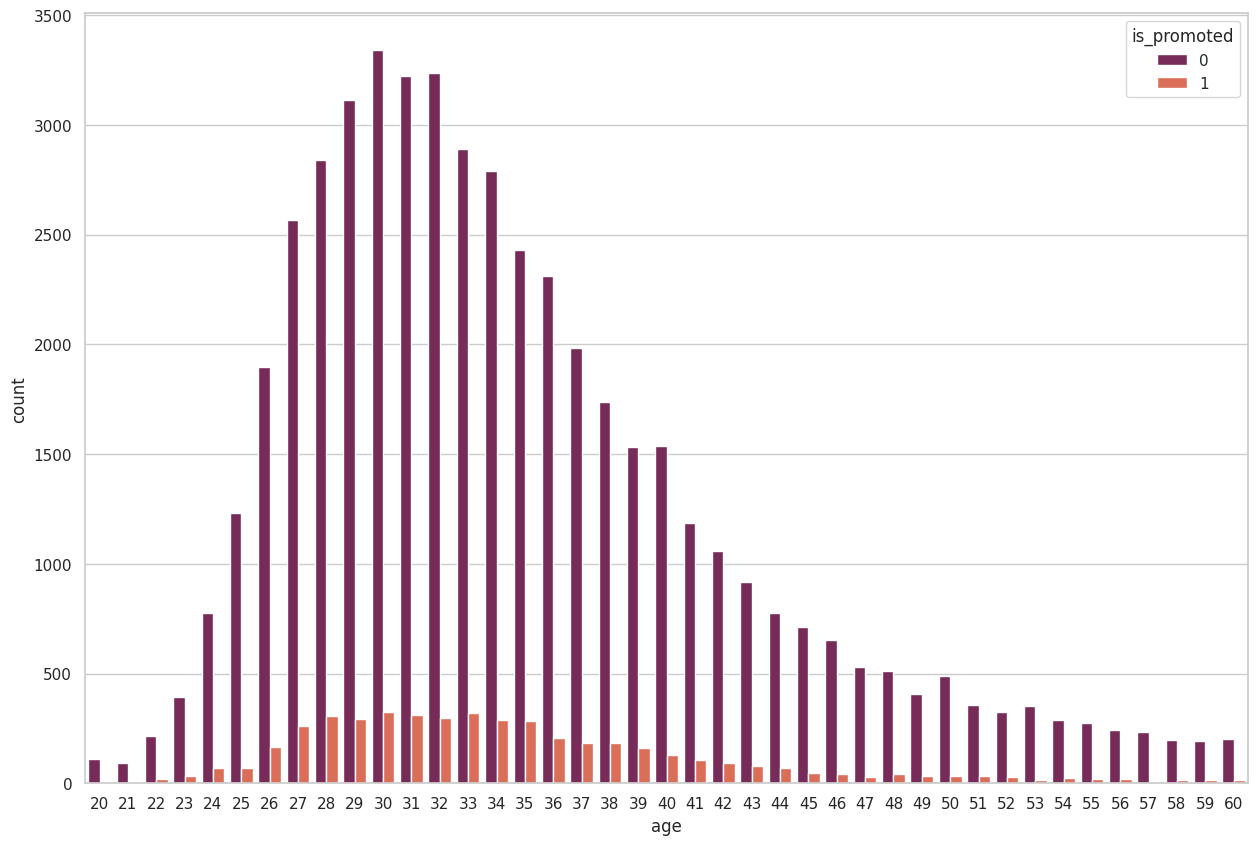

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='age',hue='is_promoted',palette="rocket")

we can see that the promotion is concentrated around the age 30 whihc is the peak

<Axes: xlabel='department', ylabel='count'>

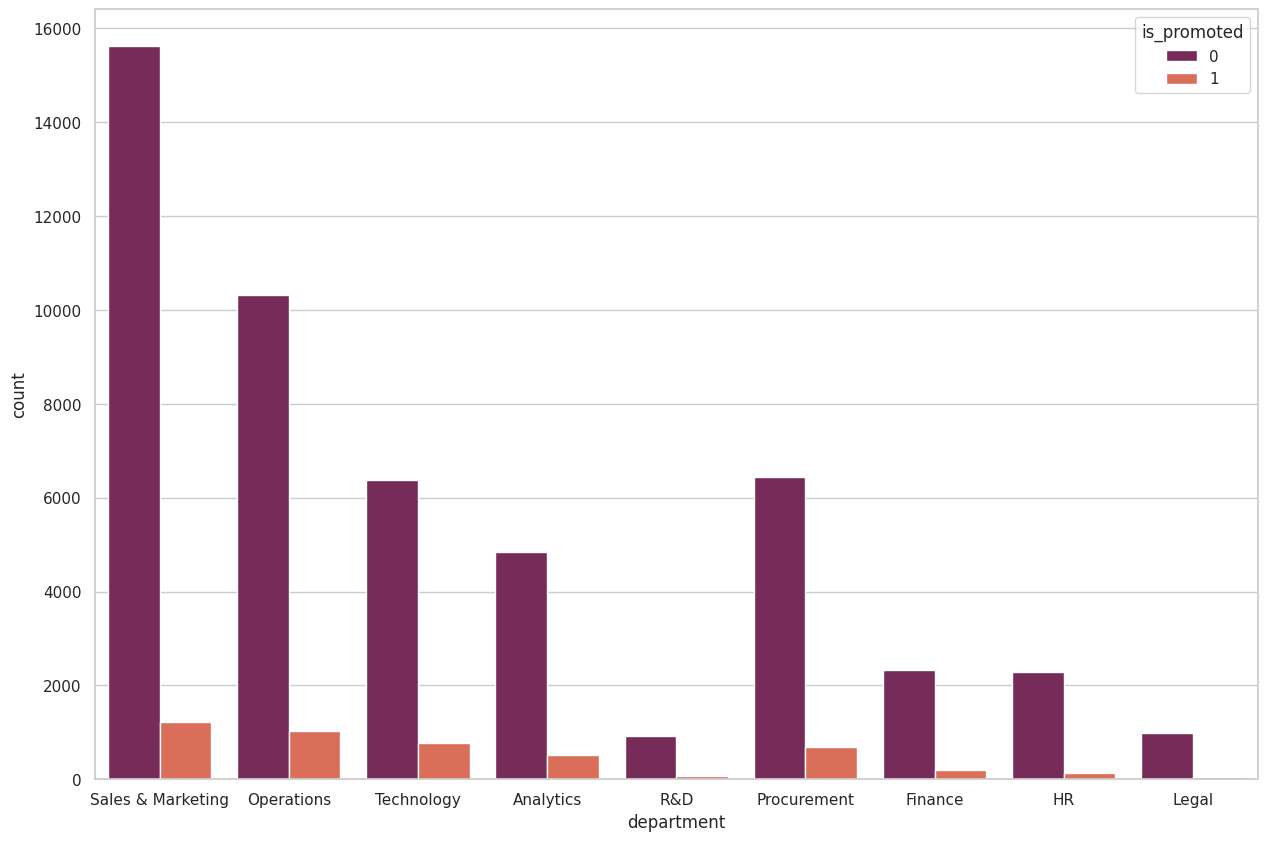

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='department',hue='is_promoted',palette="rocket")

we can see that the promotion happens on the first 4 department that has more instnaces

In [ ]:
rh['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
Other,6037
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'region_2'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'region_7'),
  Text(4, 0, 'region_15'),
  Text(5, 0, 'region_13'),
  Text(6, 0, 'region_26'),
  Text(7, 0, 'region_31'),
  Text(8, 0, 'region_4'),
  Text(9, 0, 'region_27'),
  Text(10, 0, 'region_16'),
  Text(11, 0, 'region_28'),
  Text(12, 0, 'region_11'),
  Text(13, 0, 'region_23'),
  Text(14, 0, 'region_29'),
  Text(15, 0, 'region_32'),
  Text(16, 0, 'region_19'),
  Text(17, 0, 'region_20'),
  Text(18, 0, 'region_14'),
  Text(19, 0, 'region_25'),
  Text(20, 0, 'region_17'),
  Text(21, 0, 'region_5')])

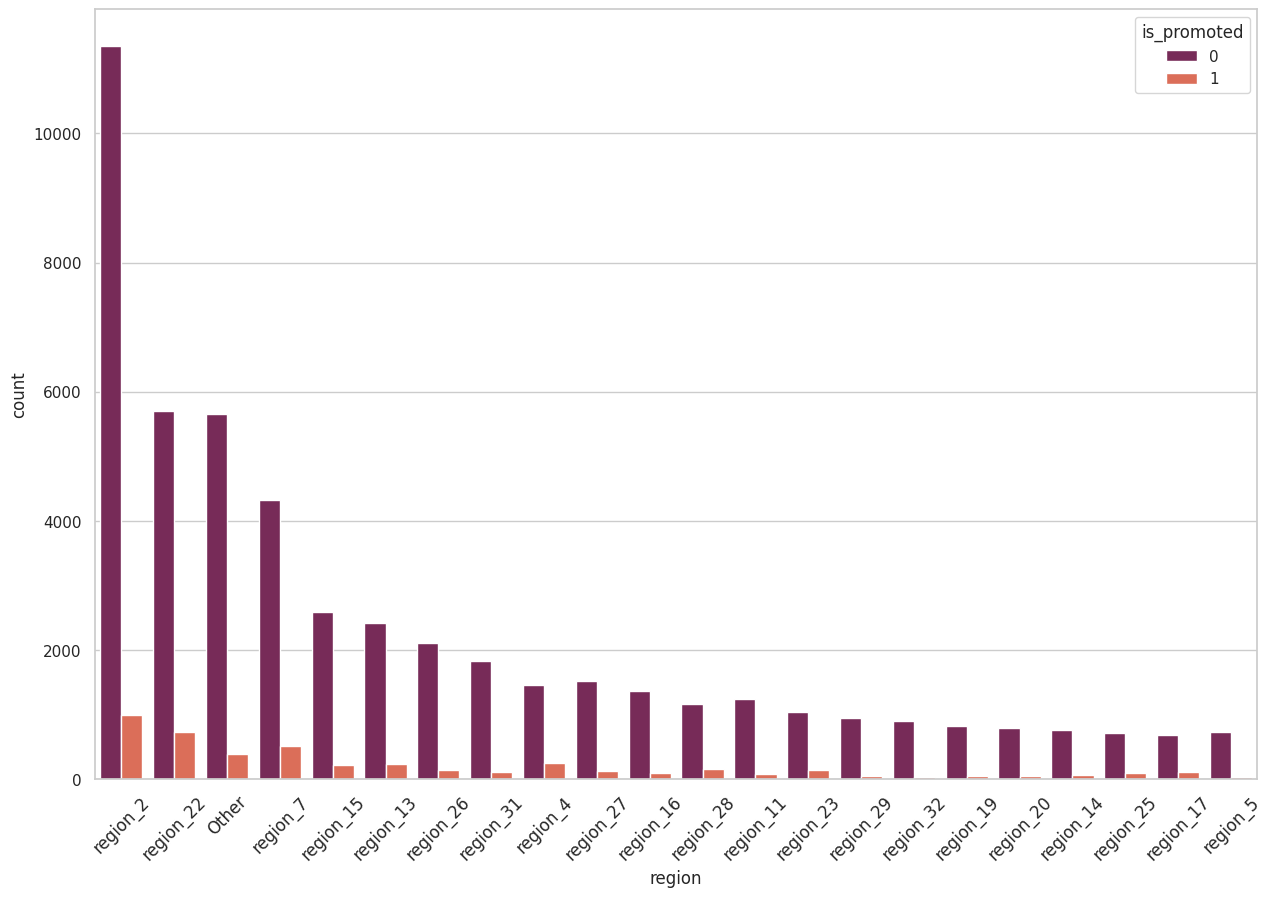

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='region',hue='is_promoted',palette="rocket",order=rh['region'].value_counts().index)
plt.xticks(rotation=45,fontsize=12)

most of promotions happen in region 2 then 22, then  7 which shows a pattern, of probably productivity

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'region_2'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'region_7'),
  Text(4, 0, 'region_15'),
  Text(5, 0, 'region_13'),
  Text(6, 0, 'region_26'),
  Text(7, 0, 'region_31'),
  Text(8, 0, 'region_4'),
  Text(9, 0, 'region_27'),
  Text(10, 0, 'region_16'),
  Text(11, 0, 'region_28'),
  Text(12, 0, 'region_11'),
  Text(13, 0, 'region_23'),
  Text(14, 0, 'region_29'),
  Text(15, 0, 'region_32'),
  Text(16, 0, 'region_19'),
  Text(17, 0, 'region_20'),
  Text(18, 0, 'region_14'),
  Text(19, 0, 'region_25'),
  Text(20, 0, 'region_17'),
  Text(21, 0, 'region_5')])

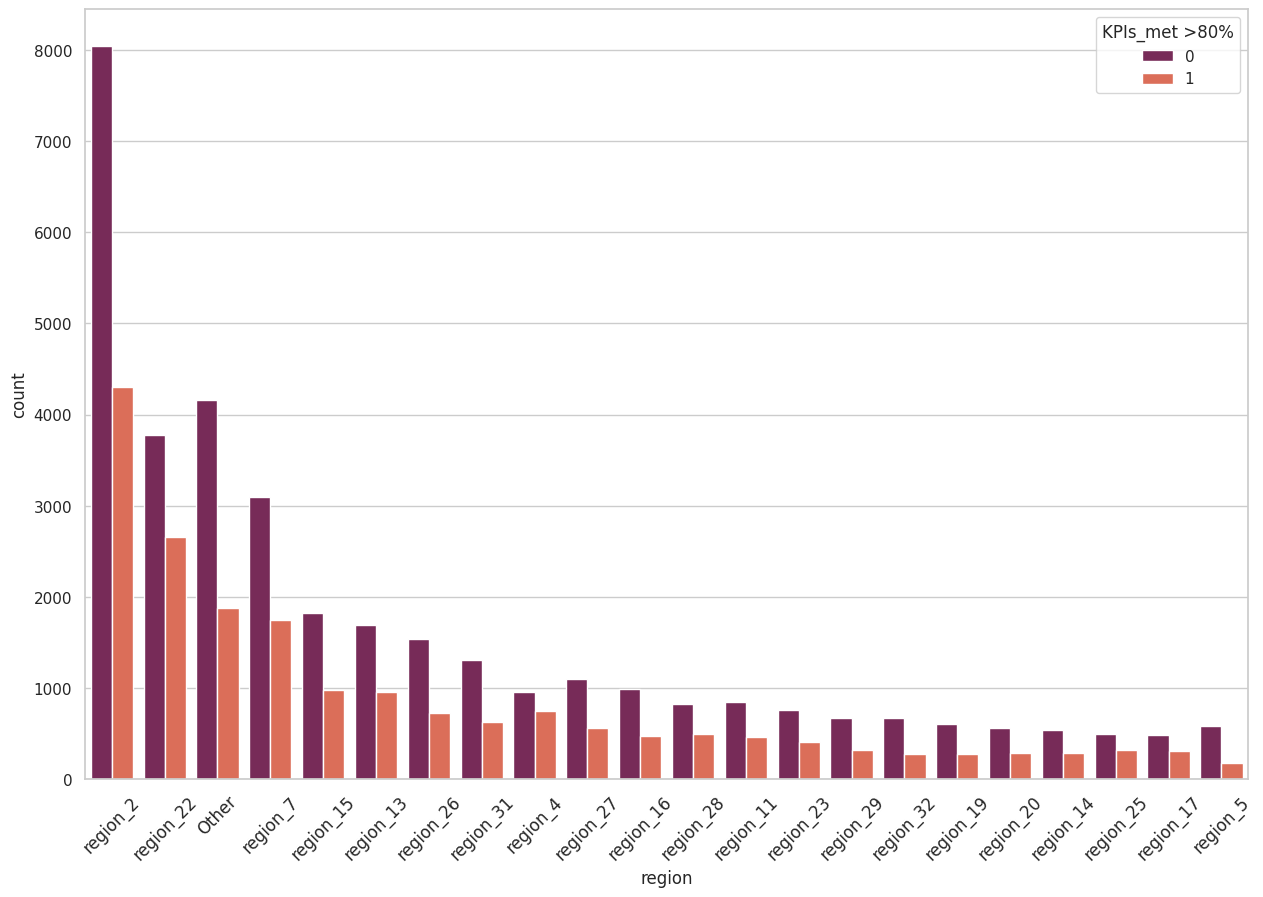

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='region',hue='KPIs_met >80%',palette="rocket",order=rh['region'].value_counts().index)
plt.xticks(rotation=45,fontsize=12)

we can confirm now at least with one variable the idea behind the promotions in the first three regions

([0, 1, 2],
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, "Master's & above"),
  Text(2, 0, 'Below Secondary')])

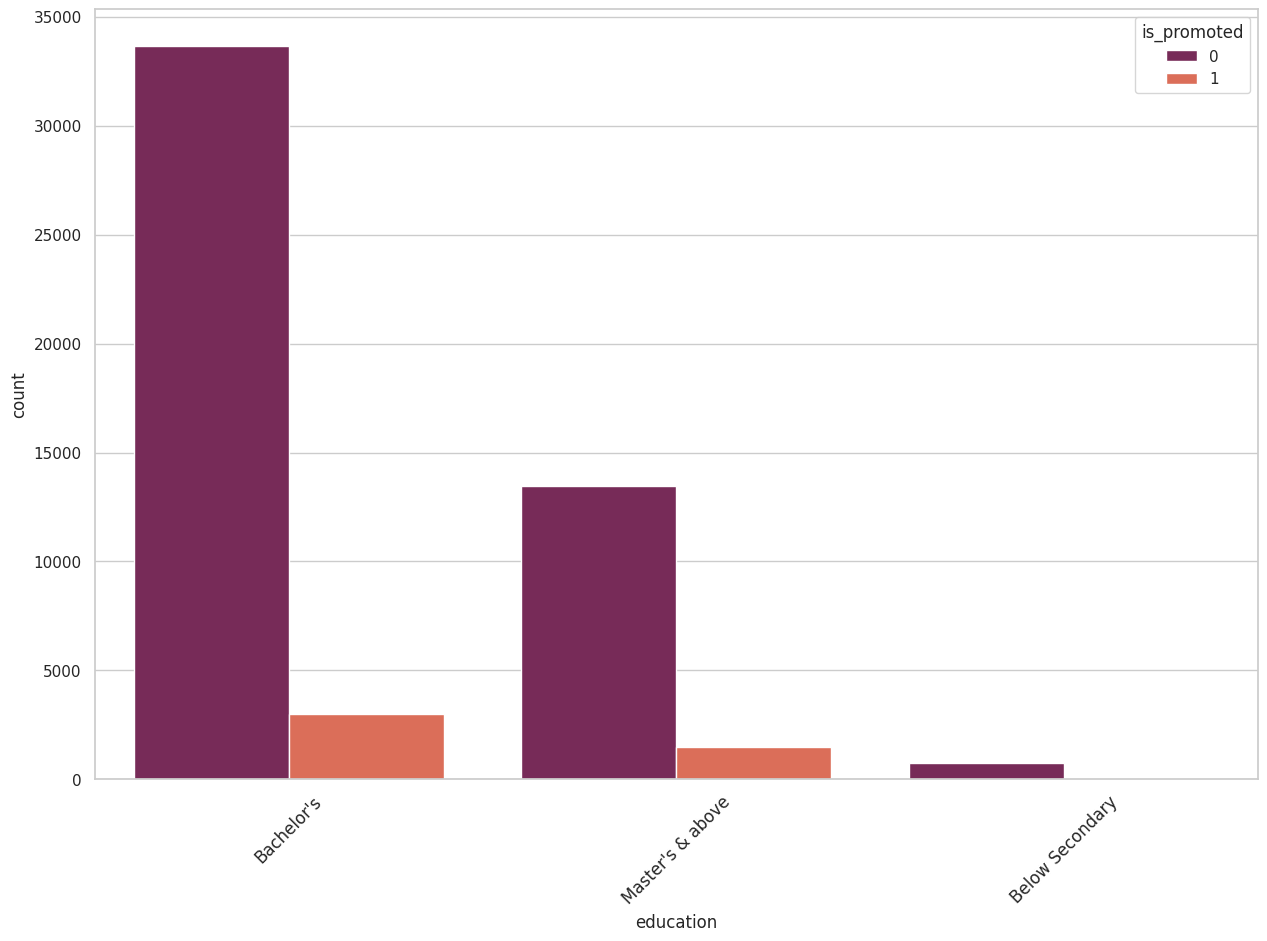

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(rh,x='education',hue='is_promoted',palette="rocket",order=rh['education'].value_counts().index)
plt.xticks(rotation=45,fontsize=12)

we can confirm the idea of the effect of degree on promotion

<ipython-input-99-71463844d2b3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=rh,x='age',y='length_of_service',palette="rocket")


<Figure size 1500x1000 with 0 Axes>

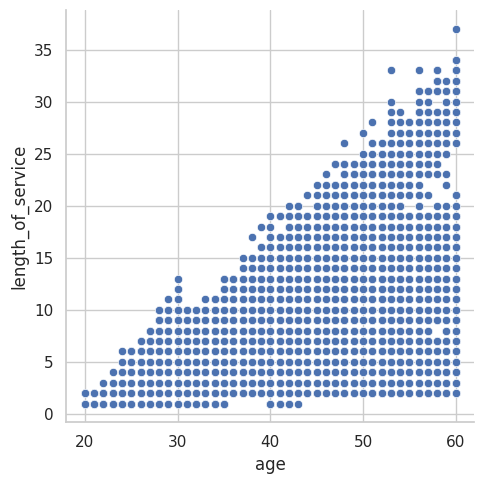

In [ ]:
plt.figure(figsize=(15,10))
sns.relplot(data=rh,x='age',y='length_of_service',palette="rocket")

when we get this we understand that most people spent less time in the company relative to their age which suggests that most employees are relativey new

# Data Preprocessing

In [7]:
#filling educvation NA
rh['education']=rh['education'].fillna(rh['education'].mode()[0])

In [8]:
# Define the columns for each transformation
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'avg_training_score','length_of_service']
categorical_onehot_features = ['gender', 'education', 'recruitment_channel', 'department']
target_encoded_feature = ['region']

In [9]:
# Numerical preprocessing pipeline
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [10]:
# Categorical preprocessing pipeline
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:

# Target encoding for the 'region' column
region_preprocessor = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder())
])

In [12]:
# Combine all preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_features),
        ('cat', categorical_preprocessor, categorical_onehot_features),
        ('region', region_preprocessor, target_encoded_feature)
    ]
)

#Modeling

##Method01: Catboost

In [25]:
# Define the final pipeline with CatBoost
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=5, sampling_strategy='minority')),
    ('classifier', CatBoostClassifier(random_state=42, verbose=1))
])


In [26]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'avg_training_score',
                                                   'length_of_service']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'education',
                                                   'recruitment_channel',
                                                   'department']),
                                                 ('region',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['region'])])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7b2f9b2de8c0>)])

In [30]:
import logging
import sys
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Set up logging to print to stdout
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Define the parameter distribution for CatBoost
param_dist = {
    'classifier__iterations': randint(50, 300),
    'classifier__depth': randint(3, 7),
    'classifier__learning_rate': uniform(0.01, 0.19),  # Uniform distribution between 0.01 and 0.2
    'classifier__l2_leaf_reg': randint(1, 10),
    'classifier__border_count': [32, 64, 128]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)



In [31]:
# Load your data
X = rh.drop(columns=['is_promoted', 'employee_id'])
y = rh['is_promoted']

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Predict with the best model
y_pred_best = random_search.best_estimator_.predict(X_test)

# Calculate the F1 score with the best model
f1_best = f1_score(y_test, y_pred_best)
print(f"Test F1 Score with Best Model: {f1_best:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.6509358	total: 55.3ms	remaining: 14s
1:	learn: 0.6179164	total: 122ms	remaining: 15.5s
2:	learn: 0.5901373	total: 186ms	remaining: 15.7s
3:	learn: 0.5692669	total: 246ms	remaining: 15.4s
4:	learn: 0.5460585	total: 314ms	remaining: 15.7s
5:	learn: 0.5330321	total: 373ms	remaining: 15.5s
6:	learn: 0.5165406	total: 412ms	remaining: 14.6s
7:	learn: 0.5050664	total: 439ms	remaining: 13.6s
8:	learn: 0.4856011	total: 466ms	remaining: 12.7s
9:	learn: 0.4738556	total: 492ms	remaining: 12s
10:	learn: 0.4633644	total: 524ms	remaining: 11.6s
11:	learn: 0.4517298	total: 551ms	remaining: 11.2s
12:	learn: 0.4436435	total: 582ms	remaining: 10.8s
13:	learn: 0.4352257	total: 607ms	remaining: 10.5s
14:	learn: 0.4234498	total: 636ms	remaining: 10.2s
15:	learn: 0.4031790	total: 663ms	remaining: 9.91s
16:	learn: 0.3954756	total: 690ms	remaining: 9.66s
17:	learn: 0.3883190	total: 714ms	remaining: 9.41s
18:	learn: 0.3790637	total: 744ms	

In [37]:
# Make predictions on rh_test
y_pred = random_search.best_estimator_.predict(rh_test)

# Create a DataFrame with the predictions
results = pd.DataFrame({
    'employee_id': rh_test['employee_id'],  # Assuming you want to keep this ID
    'is_promoted': y_pred
})

# Save results to a CSV file
results.to_csv('predictions.csv', index=False)

print("Predictions have been saved to 'predictions.csv'.")



Predictions have been saved to 'predictions.csv'.


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15043
           1       0.41      0.47      0.44      1400

    accuracy                           0.90     16443
   macro avg       0.68      0.70      0.69     16443
weighted avg       0.90      0.90      0.90     16443



##Method02:Voting with XGBoost,Lightgbm , catboost with No hyperparametre tunning

In [14]:
# Define the models
xgb_model = XGBClassifier(random_state=42)
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('catboost', catboost_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # or 'hard'
)

# Define the final pipeline with Voting Classifier
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=5, sampling_strategy='minority')),
    ('classifier', voting_clf)
])
X = rh.drop(columns=['is_promoted', 'employee_id'])
y = rh['is_promoted']

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred_voting = model_pipeline.predict(X_test)
f1_voting = f1_score(y_test, y_pred_voting)
print(f"Test F1 Score with Voting Classifier (no tuning): {f1_voting:.4f}")
print(classification_report(y_test, y_pred_voting))


[LightGBM] [Info] Number of positive: 42618, number of negative: 42618
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5280
[LightGBM] [Info] Number of data points in the train set: 85236, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test F1 Score with Voting Classifier (no tuning): 0.5083
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7522
           1       0.94      0.35      0.51       700

    accuracy                           0.94      8222
   macro avg       0.94      0.67      0.74      8222
weighted avg       0.94      0.94      0.93      8222



##Method03:Voting with XGBoost,Lightgbm , catboost with hyperparametre tunning

In [15]:
# Define the models
xgb_model = XGBClassifier(random_state=42)
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('catboost', catboost_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # or 'hard'
)

# Define the final pipeline with Voting Classifier
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=5, sampling_strategy='minority')),
    ('classifier', voting_clf)
])

# Define parameter distributions for each model
xgb_param_dist = {
    'classifier__xgb__n_estimators': [100, 200],
    'classifier__xgb__learning_rate': [0.01, 0.1, 0.2],
    'classifier__xgb__max_depth': [3, 5, 7],
    'classifier__xgb__colsample_bytree': [0.3, 0.7, 1]
}

catboost_param_dist = {
    'classifier__catboost__iterations': [100, 200],
    'classifier__catboost__learning_rate': [0.01, 0.1, 0.2],
    'classifier__catboost__depth': [6, 8, 10],
    'classifier__catboost__l2_leaf_reg': [1, 3, 5]
}

lgb_param_dist = {
    'classifier__lgb__n_estimators': [100, 200],
    'classifier__lgb__learning_rate': [0.01, 0.1, 0.2],
    'classifier__lgb__num_leaves': [31, 63, 127],
    'classifier__lgb__min_child_samples': [20, 30, 50]
}

# Combine parameter distributions
param_dist = {**xgb_param_dist, **catboost_param_dist, **lgb_param_dist}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=model_pipeline, param_distributions=param_dist, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)

# Train the pipeline with randomized search
random_search.fit(X_train, y_train)

# Get the best model
best_model_pipeline = random_search.best_estimator_

# Evaluate the Voting Classifier with tuned models
y_pred_voting_tuned = best_model_pipeline.predict(X_test)
f1_voting_tuned = f1_score(y_test, y_pred_voting_tuned)
print(f"Test F1 Score with Voting Classifier (with tuning): {f1_voting_tuned:.4f}")
print(classification_report(y_test, y_pred_voting_tuned))


[LightGBM] [Info] Number of positive: 42618, number of negative: 42618
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5297
[LightGBM] [Info] Number of data points in the train set: 85236, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test F1 Score with Voting Classifier (with tuning): 0.5066
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7522
           1       0.88      0.36      0.51       700

    accuracy                           0.94      8222
   macro avg       0.91      0.68      0.74      8222
weighted avg       0.94      0.94      0.93      8222



In [16]:
# Generate predictions using the model without tuning
y_pred_no_tuning = model_pipeline.fit(X_train, y_train).predict(rh_test)

# Create a DataFrame with employee_id and is_promoted
submission_no_tuning = pd.DataFrame({
    'employee_id': rh_test['employee_id'],  # Assuming rh_test has an 'employee_id' column
    'is_promoted': y_pred_no_tuning
})

# Export to CSV
submission_no_tuning.to_csv('submission_no_tuning.csv', index=False)
print("Predictions without tuning saved to submission_no_tuning.csv")

[LightGBM] [Info] Number of positive: 42618, number of negative: 42618
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5284
[LightGBM] [Info] Number of data points in the train set: 85236, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Predictions without tuning saved to submission_no_tuning.csv


In [17]:
f1_voting_tuned

0.5066124109867752

In [18]:
f1_voting

0.5083333333333333

---

**Project Summary: Ensemble Learning with XGBoost, LightGBM, and CatBoost**

In this project, I explored different machine learning techniques to predict employee promotions. Initially, I implemented a CatBoost model, which yielded an F1 score of **0.5005**. To enhance the predictive performance, I then employed a voting ensemble method, combining three powerful gradient boosting algorithms: XGBoost, LightGBM, and CatBoost.

I used two approaches with the voting method: one with hyperparameter tuning and one without. Both approaches followed nearly identical preprocessing pipelines, ensuring a fair comparison. The results were as follows:

- **Without Tuning**: The ensemble model achieved an F1 score of **0.5083**, showing an improvement over the initial CatBoost model.
- **With Tuning**: The ensemble model achieved an F1 score of **0.5066**.

These results demonstrate that while hyperparameter tuning typically enhances model performance, in this case, the ensemble method without tuning slightly outperformed the tuned version. The marginal improvements achieved by the ensemble method suggest that combining multiple models can lead to better generalization, even without extensive tuning.

Overall, the ensemble method provided the best performance, validating the utility of leveraging multiple algorithms in a voting strategy to achieve better results than any single model could provide.